In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import stats, skew, kurtosis
from sklearn.metrics import mean_absolute_error


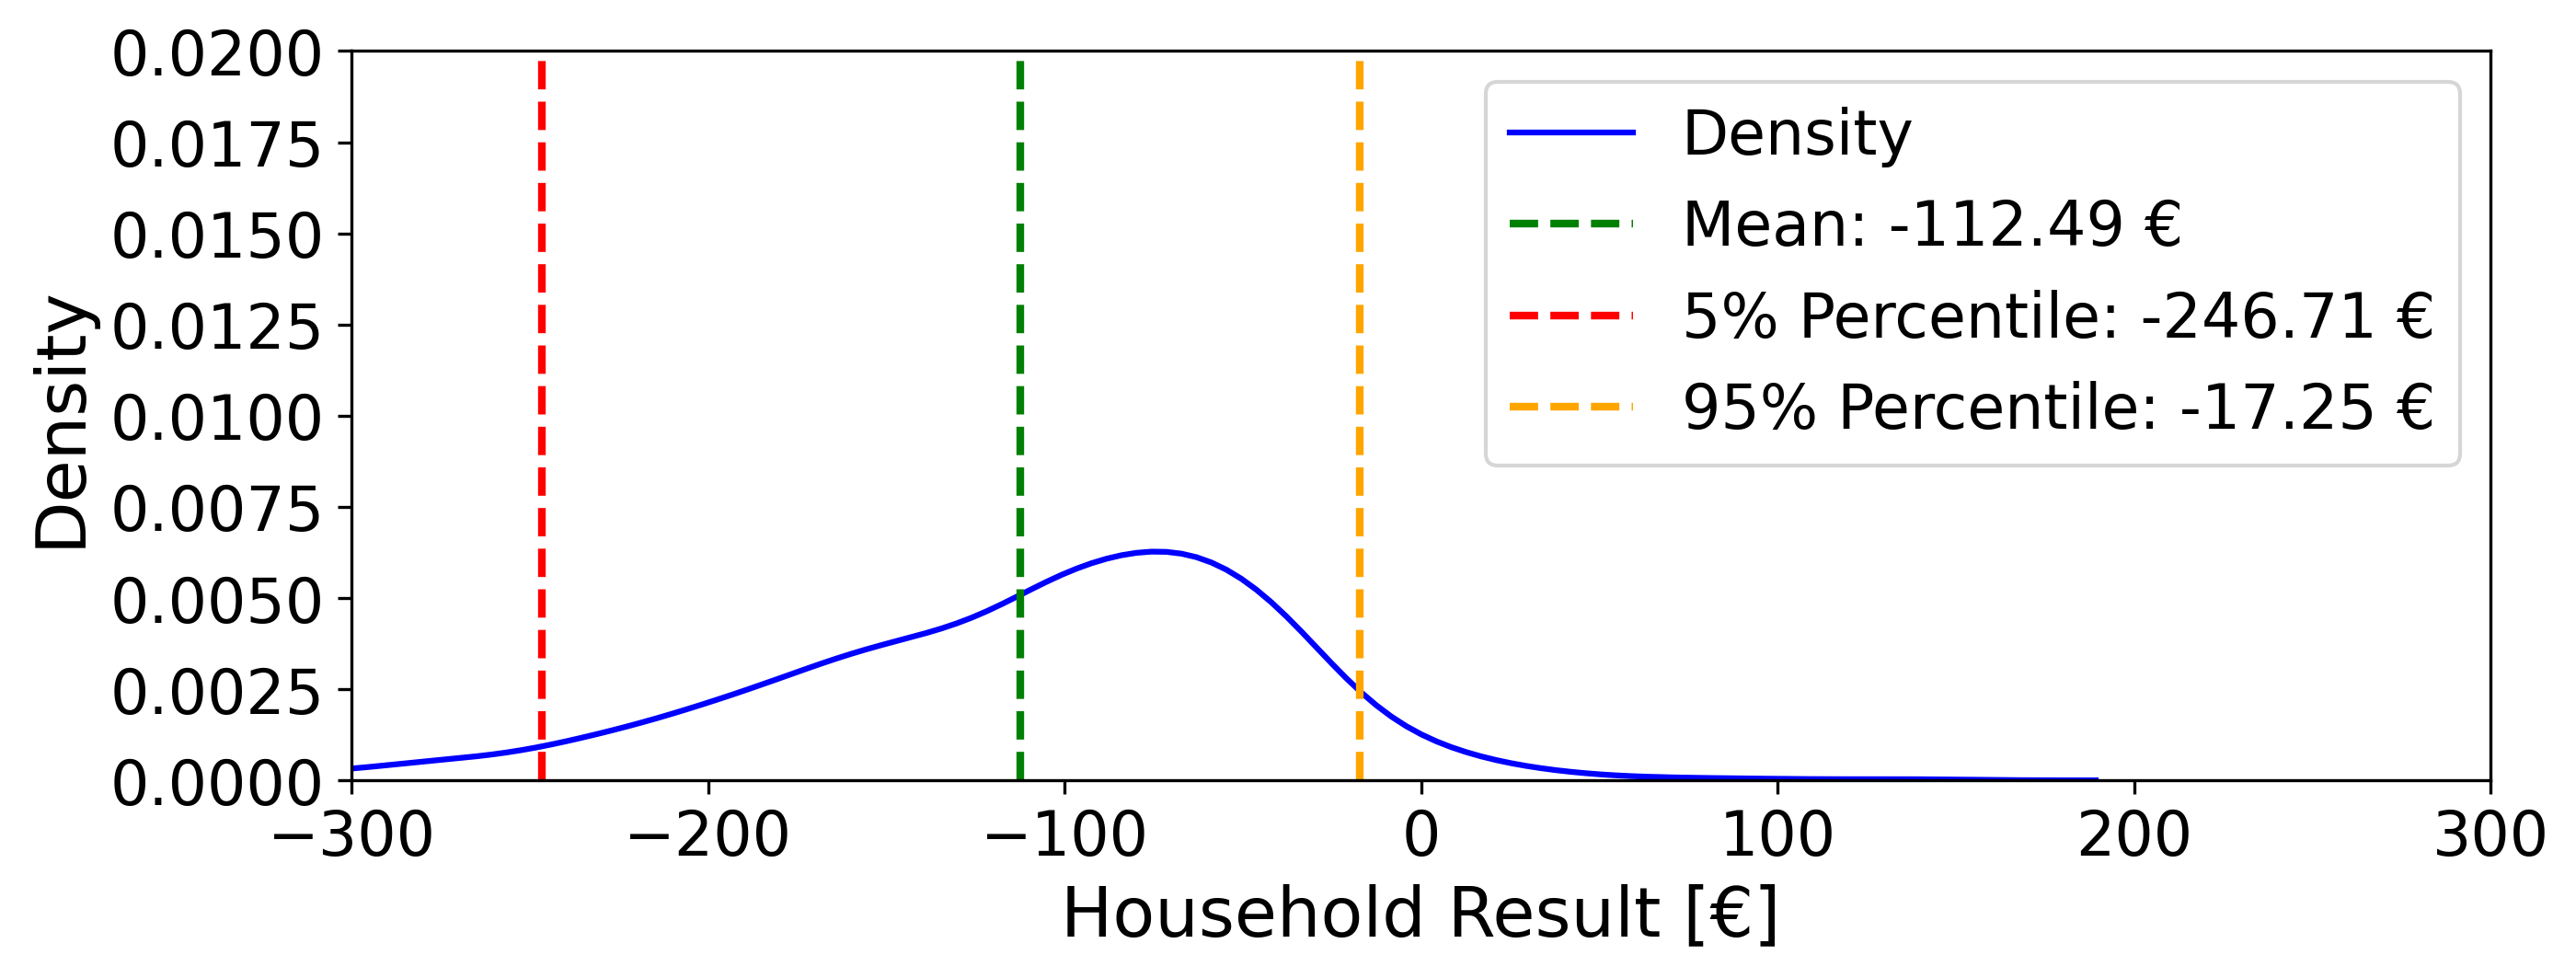

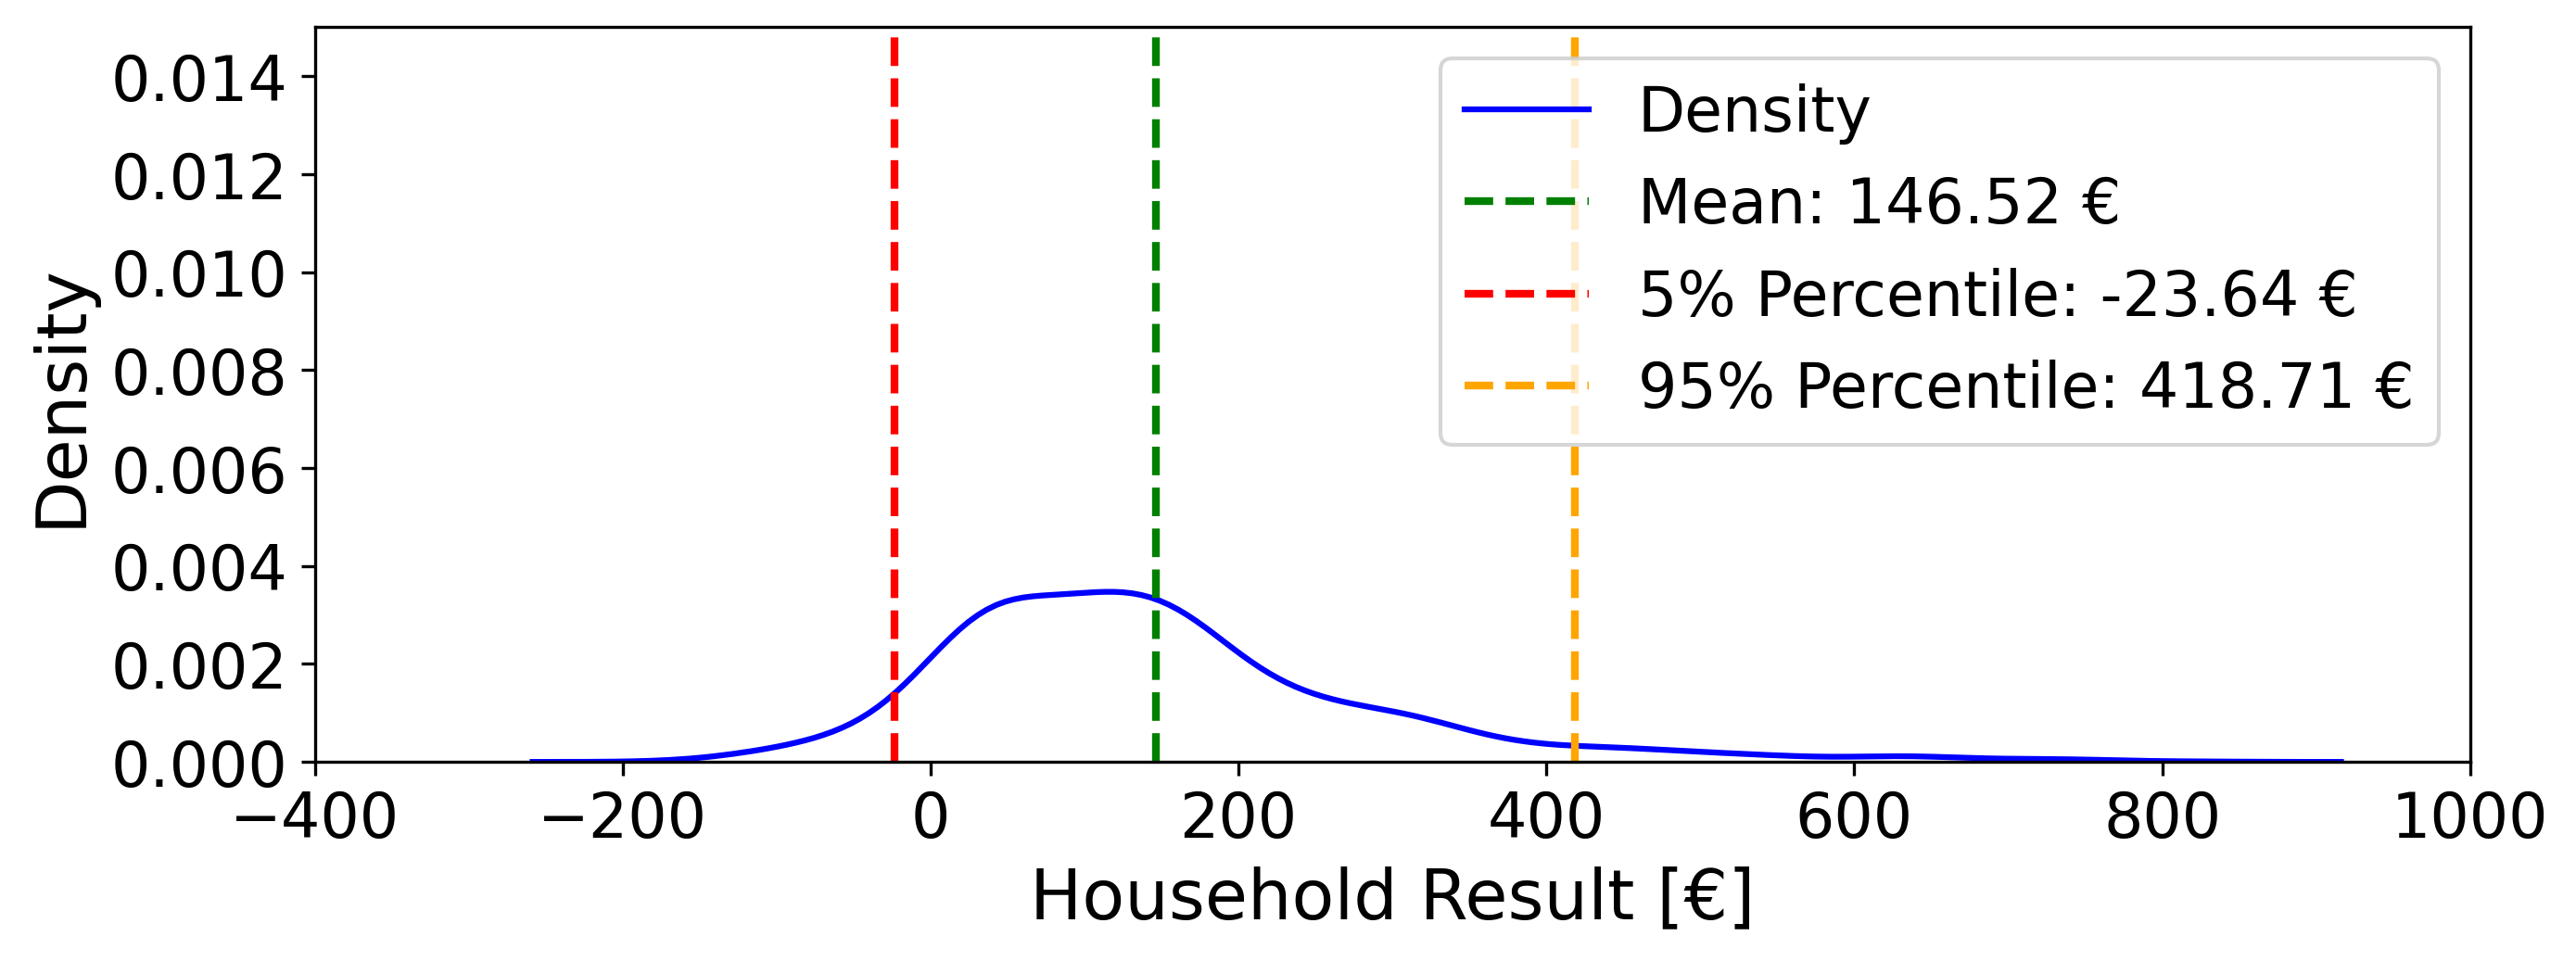

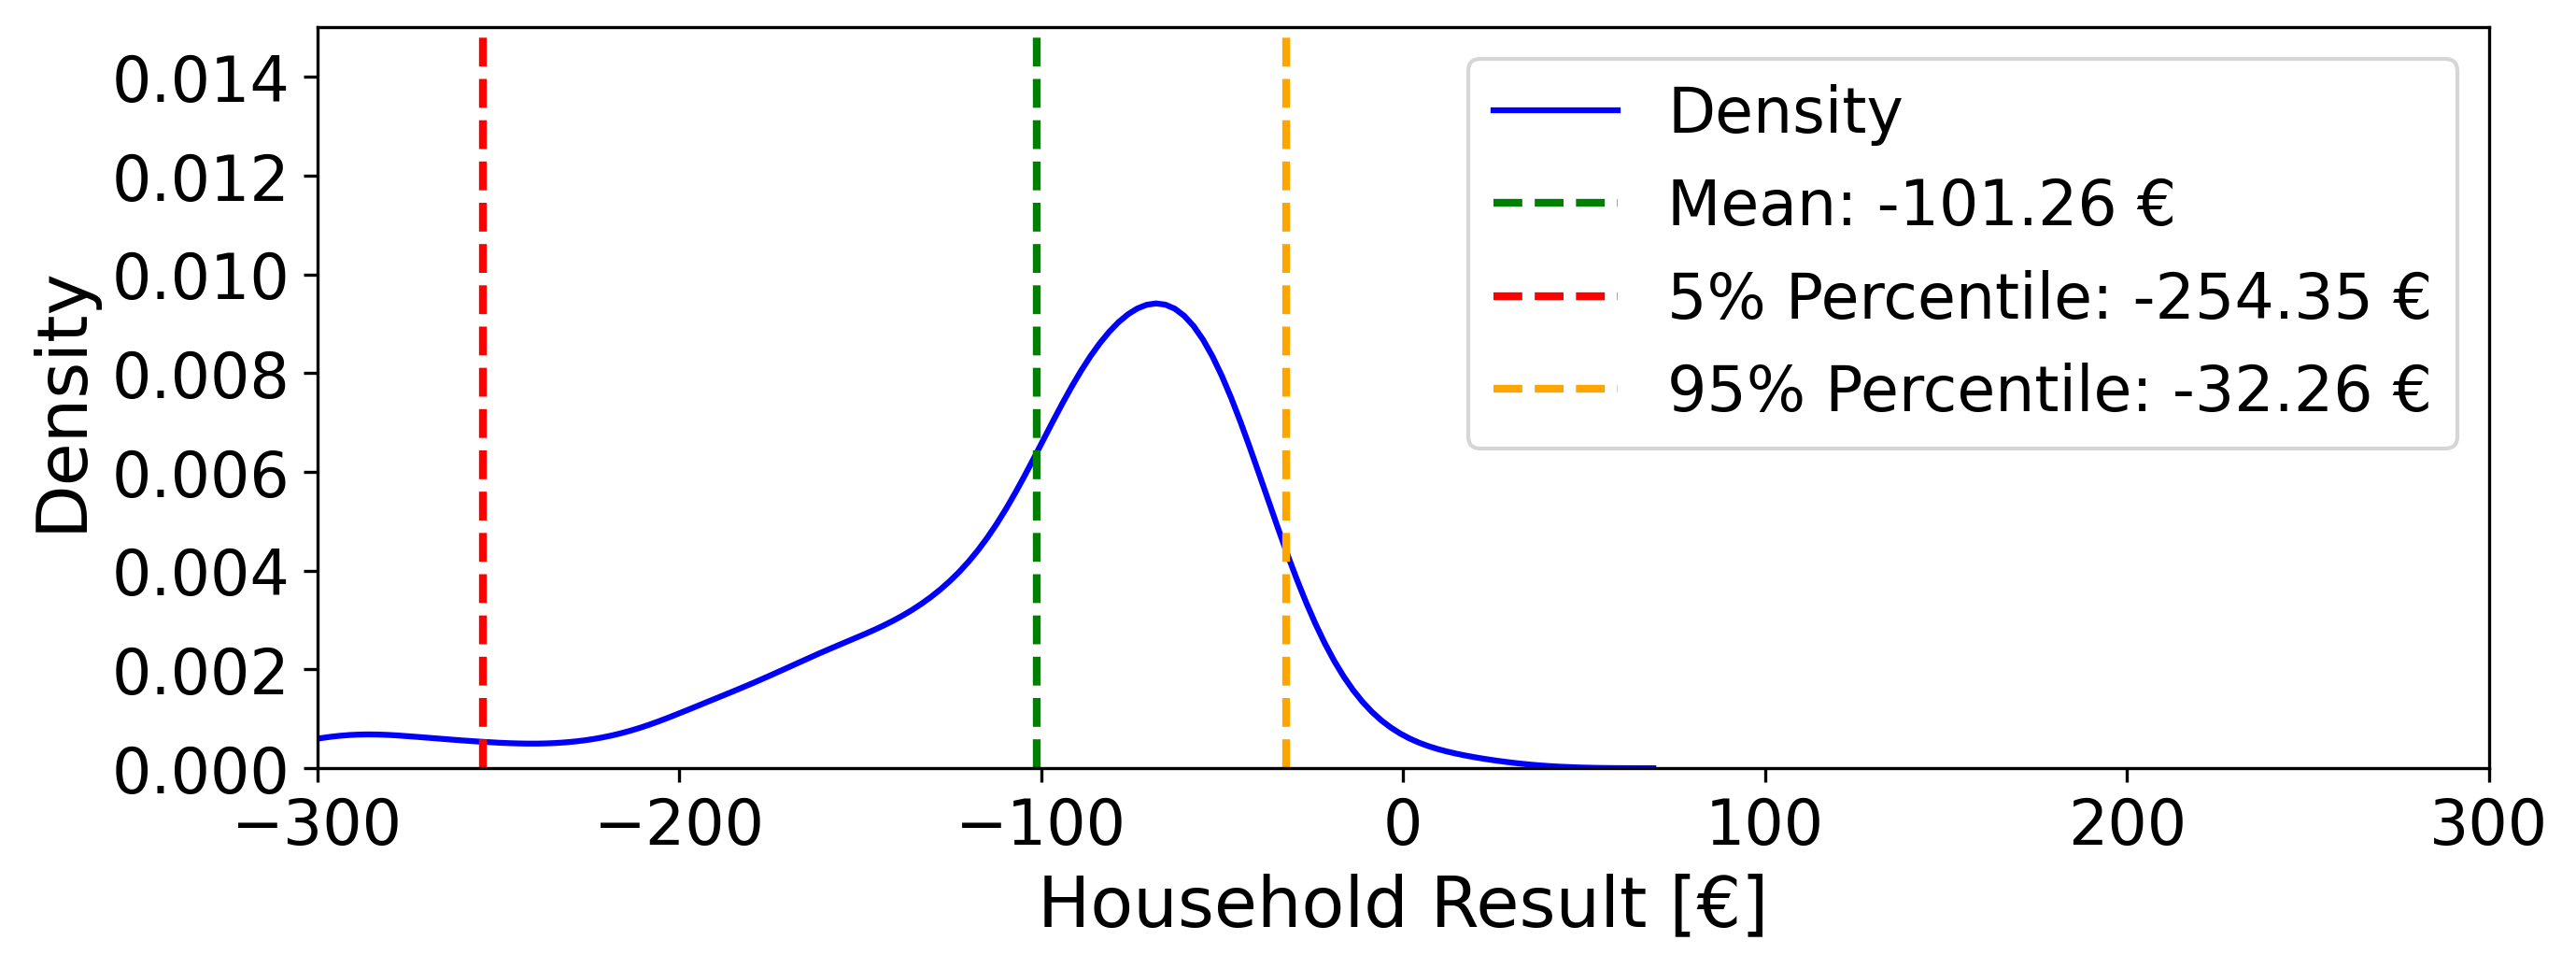

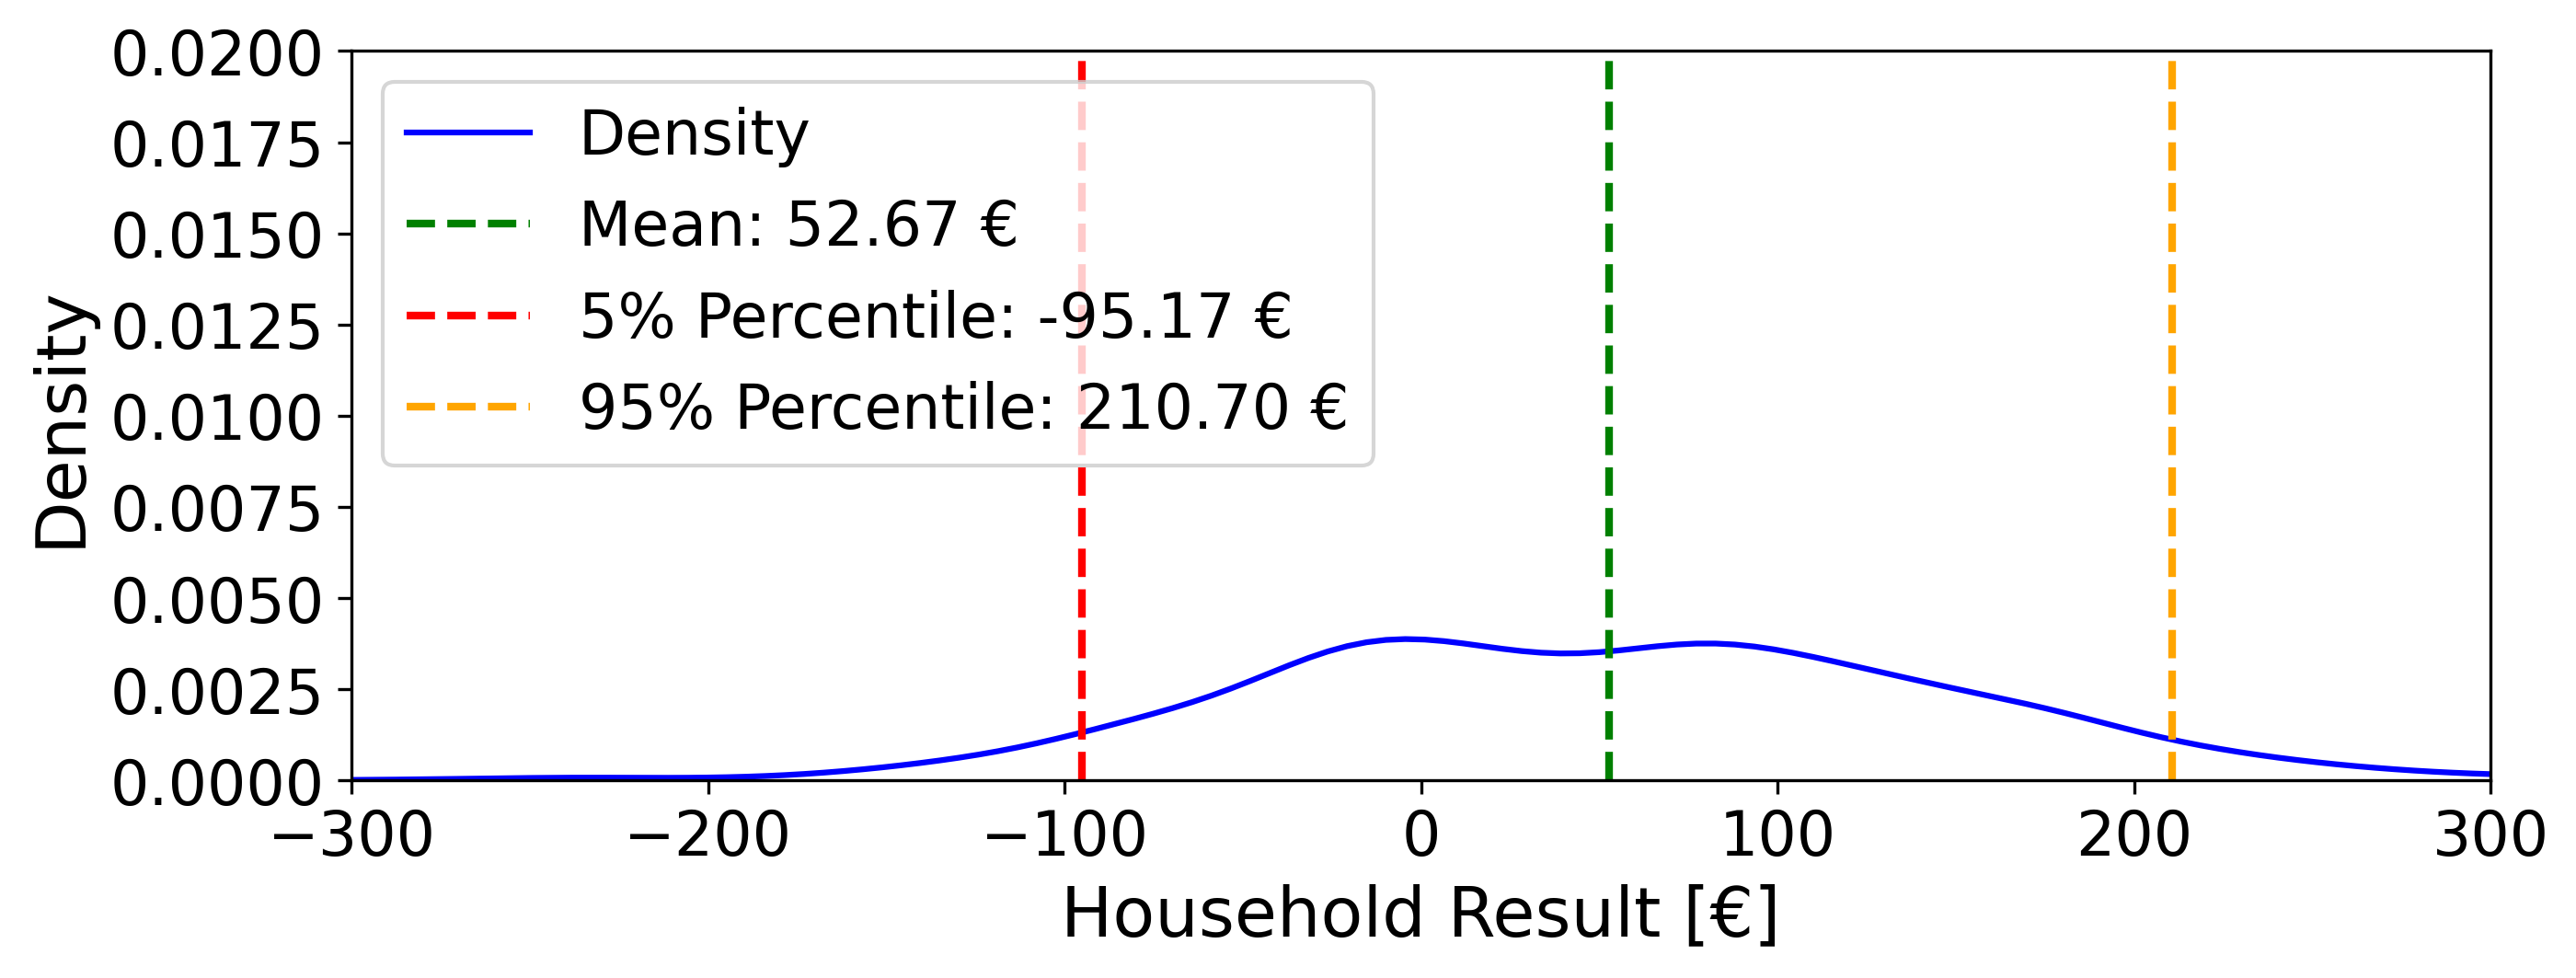

<ipython-input-5-e5eb94aeb962>:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["const"] = 1
<ipython-input-5-e5eb94aeb962>:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["const"] = 1
/Users/leosemmelmann/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


                                        QuantReg Regression Results                                         
Dep. Variable:     Relative Difference Guaranteed to Avg. Price [%]   Pseudo R-squared:               0.2776
Model:                                                     QuantReg   Bandwidth:                      0.4832
Method:                                               Least Squares   Sparsity:                        2.888
Date:                                              Wed, 21 Jan 2026   No. Observations:                 3731
Time:                                                      18:08:35   Df Residuals:                     3722
                                                                      Df Model:                            8
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
building_type                    

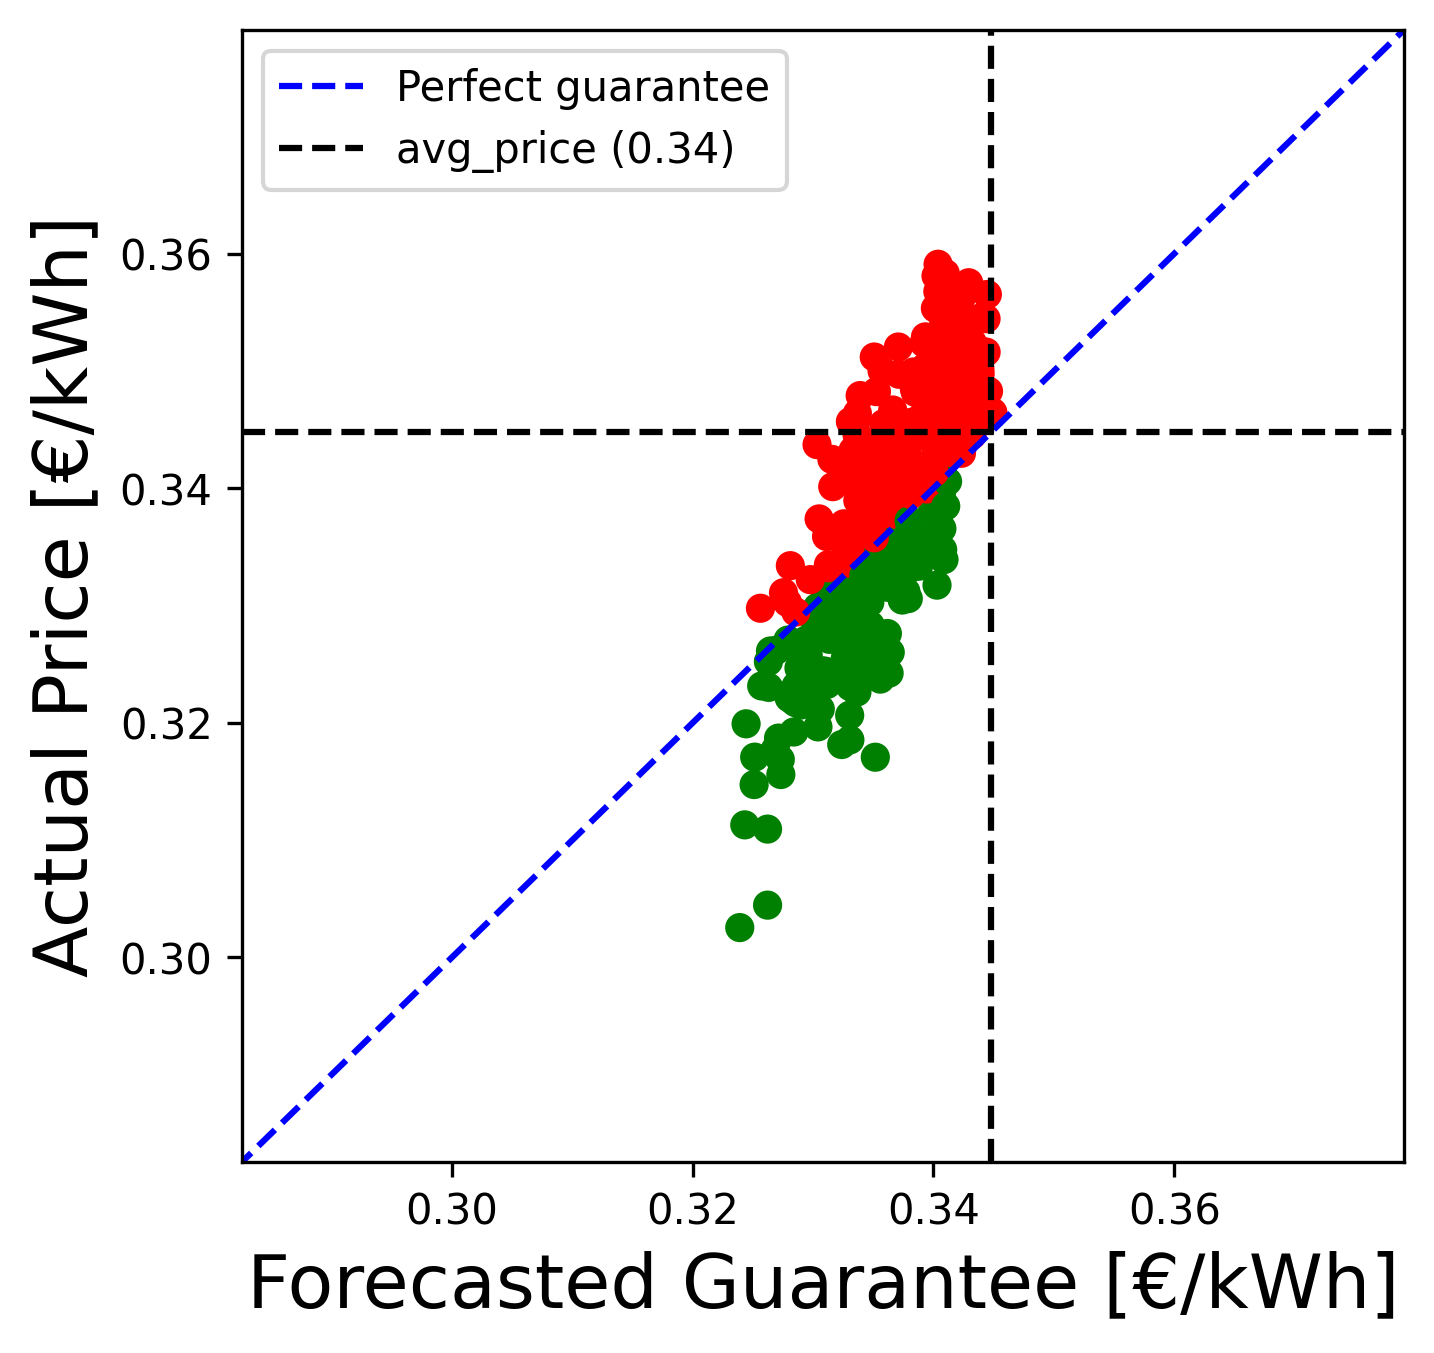

--- data regression ---
14        8.600484
26      -84.863948
53      -80.853849
59     -260.693141
76      -50.727131
           ...    
9081     34.455270
9119    -88.194061
9188   -136.297969
9223     19.754905
9276     81.462800
Name: Household result [€], Length: 205, dtype: float64


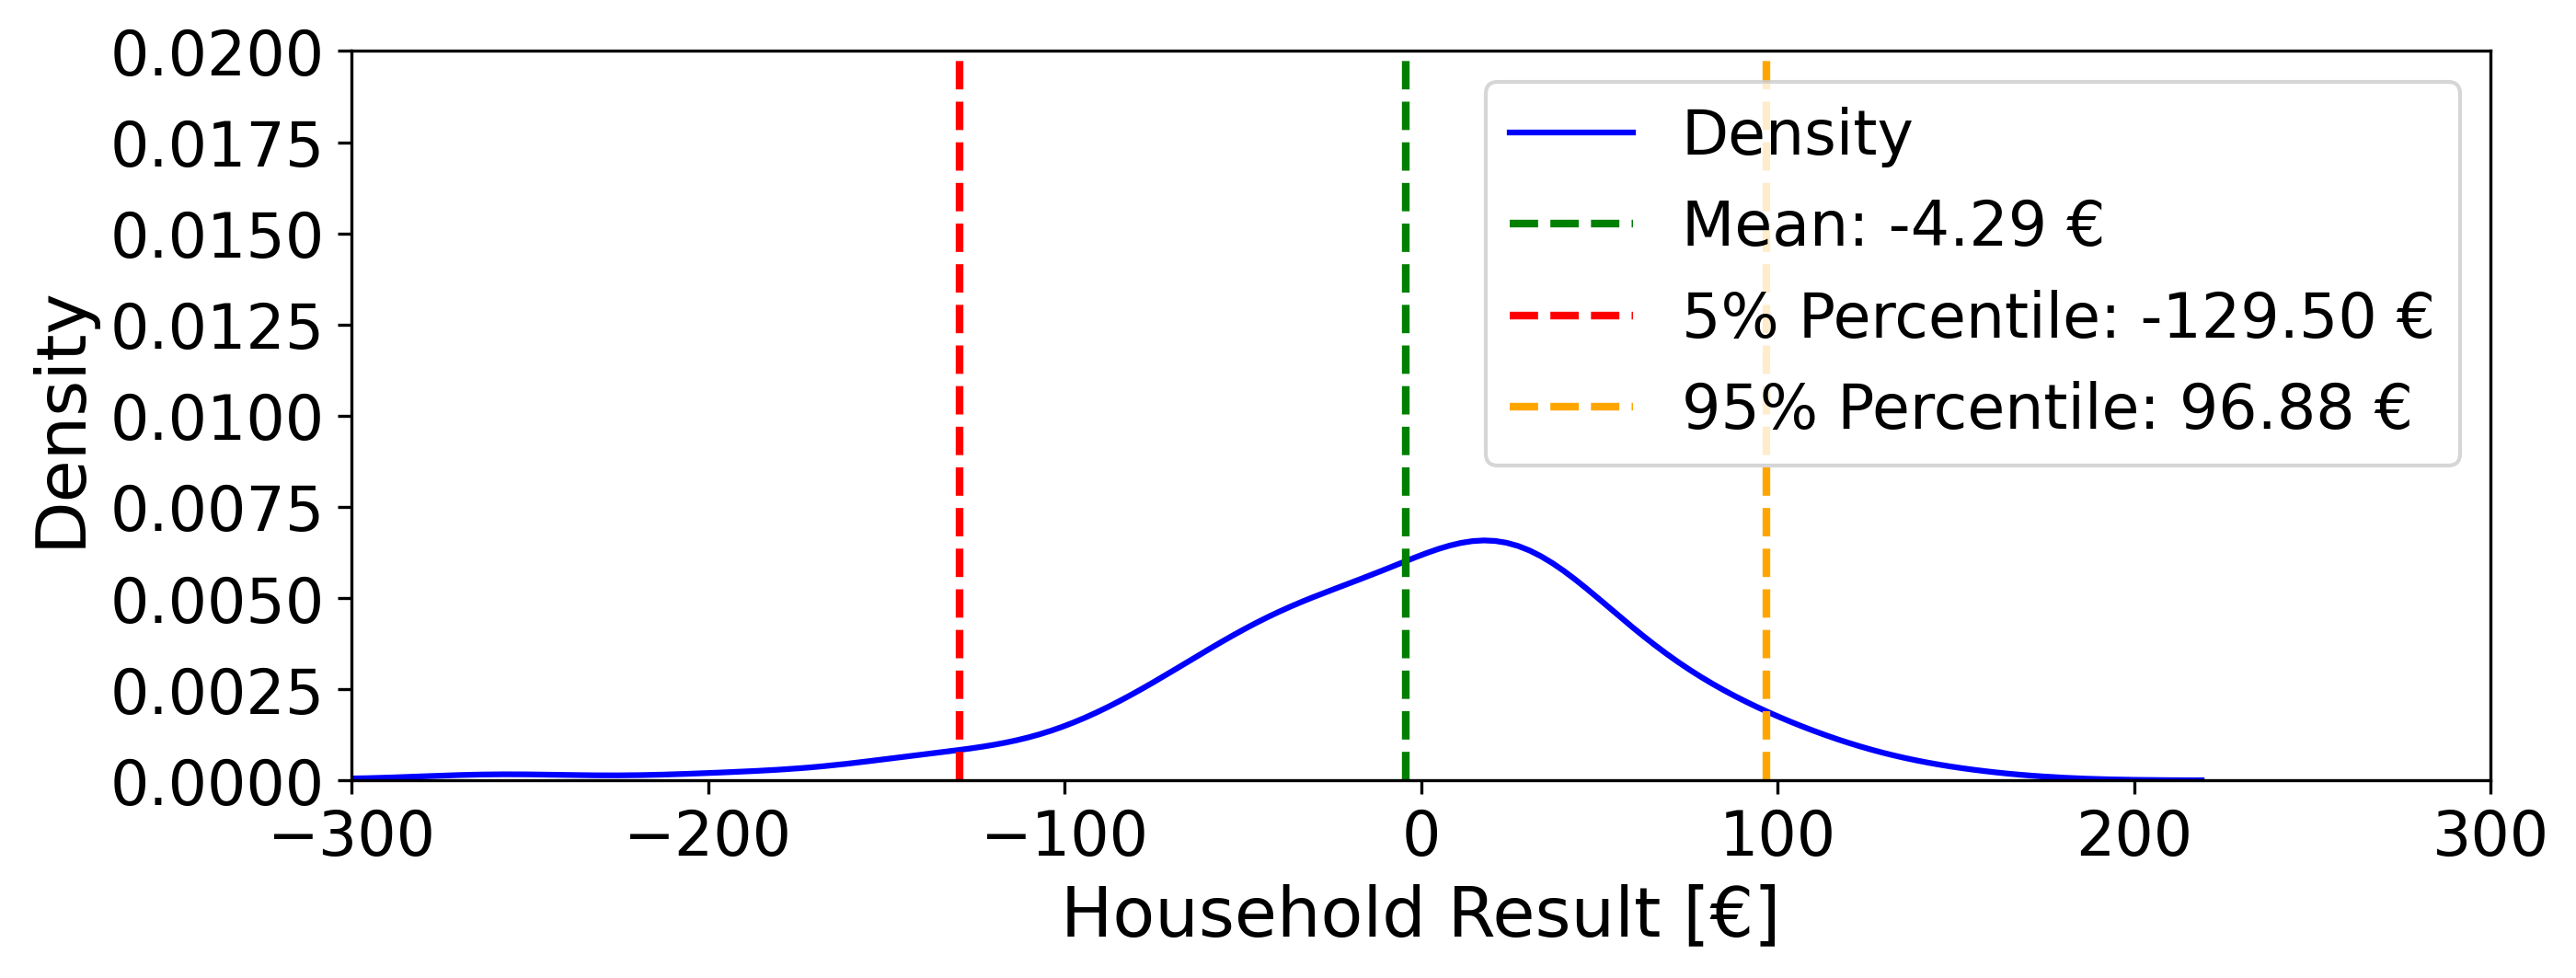

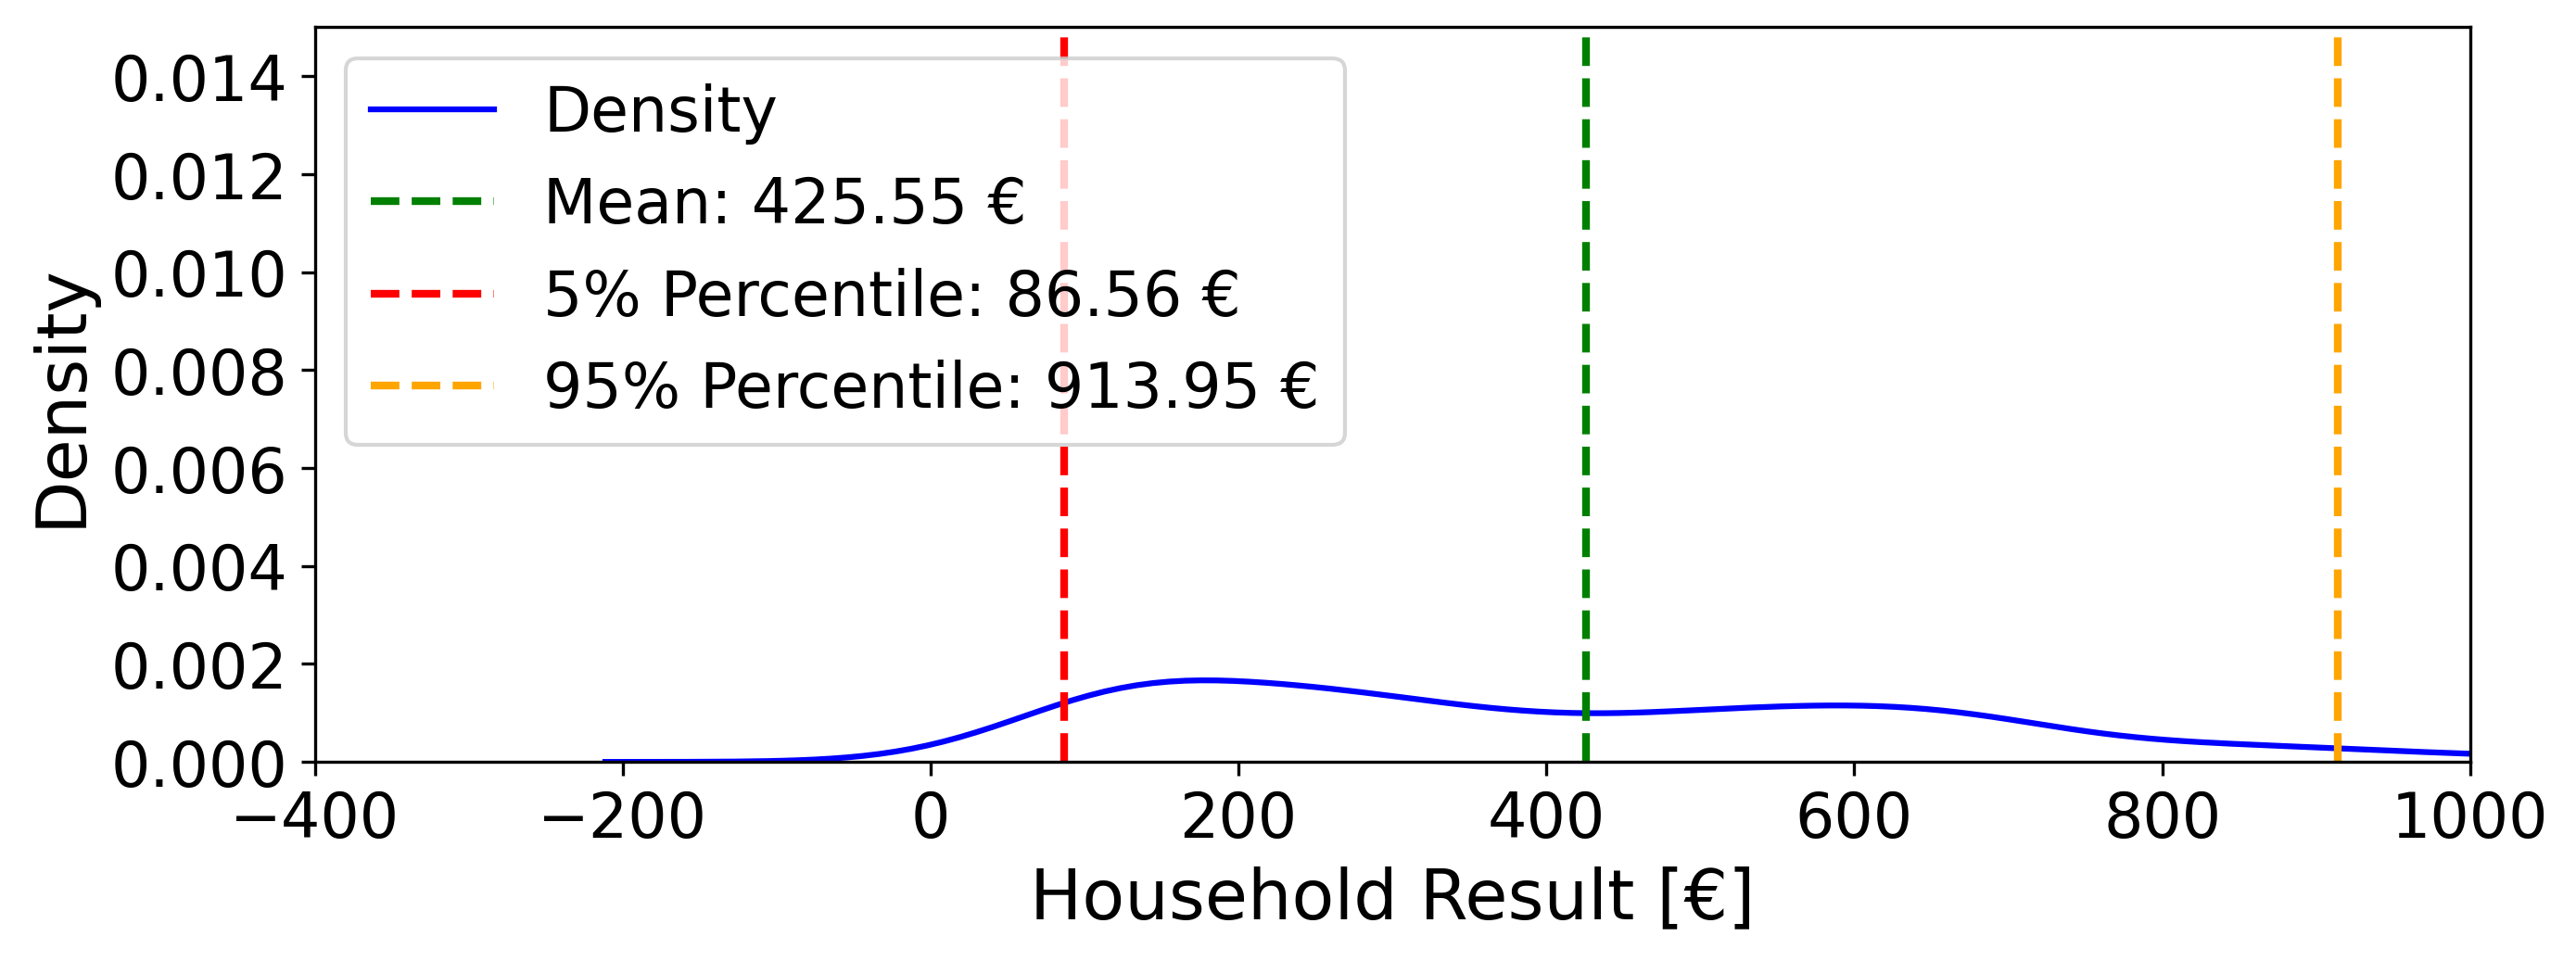

<ipython-input-5-e5eb94aeb962>:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["const"] = 1
<ipython-input-5-e5eb94aeb962>:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["const"] = 1


                                        QuantReg Regression Results                                         
Dep. Variable:     Relative Difference Guaranteed to Avg. Price [%]   Pseudo R-squared:               0.3054
Model:                                                     QuantReg   Bandwidth:                      0.4672
Method:                                               Least Squares   Sparsity:                        3.467
Date:                                              Wed, 21 Jan 2026   No. Observations:                 4937
Time:                                                      18:08:37   Df Residuals:                     4928
                                                                      Df Model:                            8
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
building_type                    

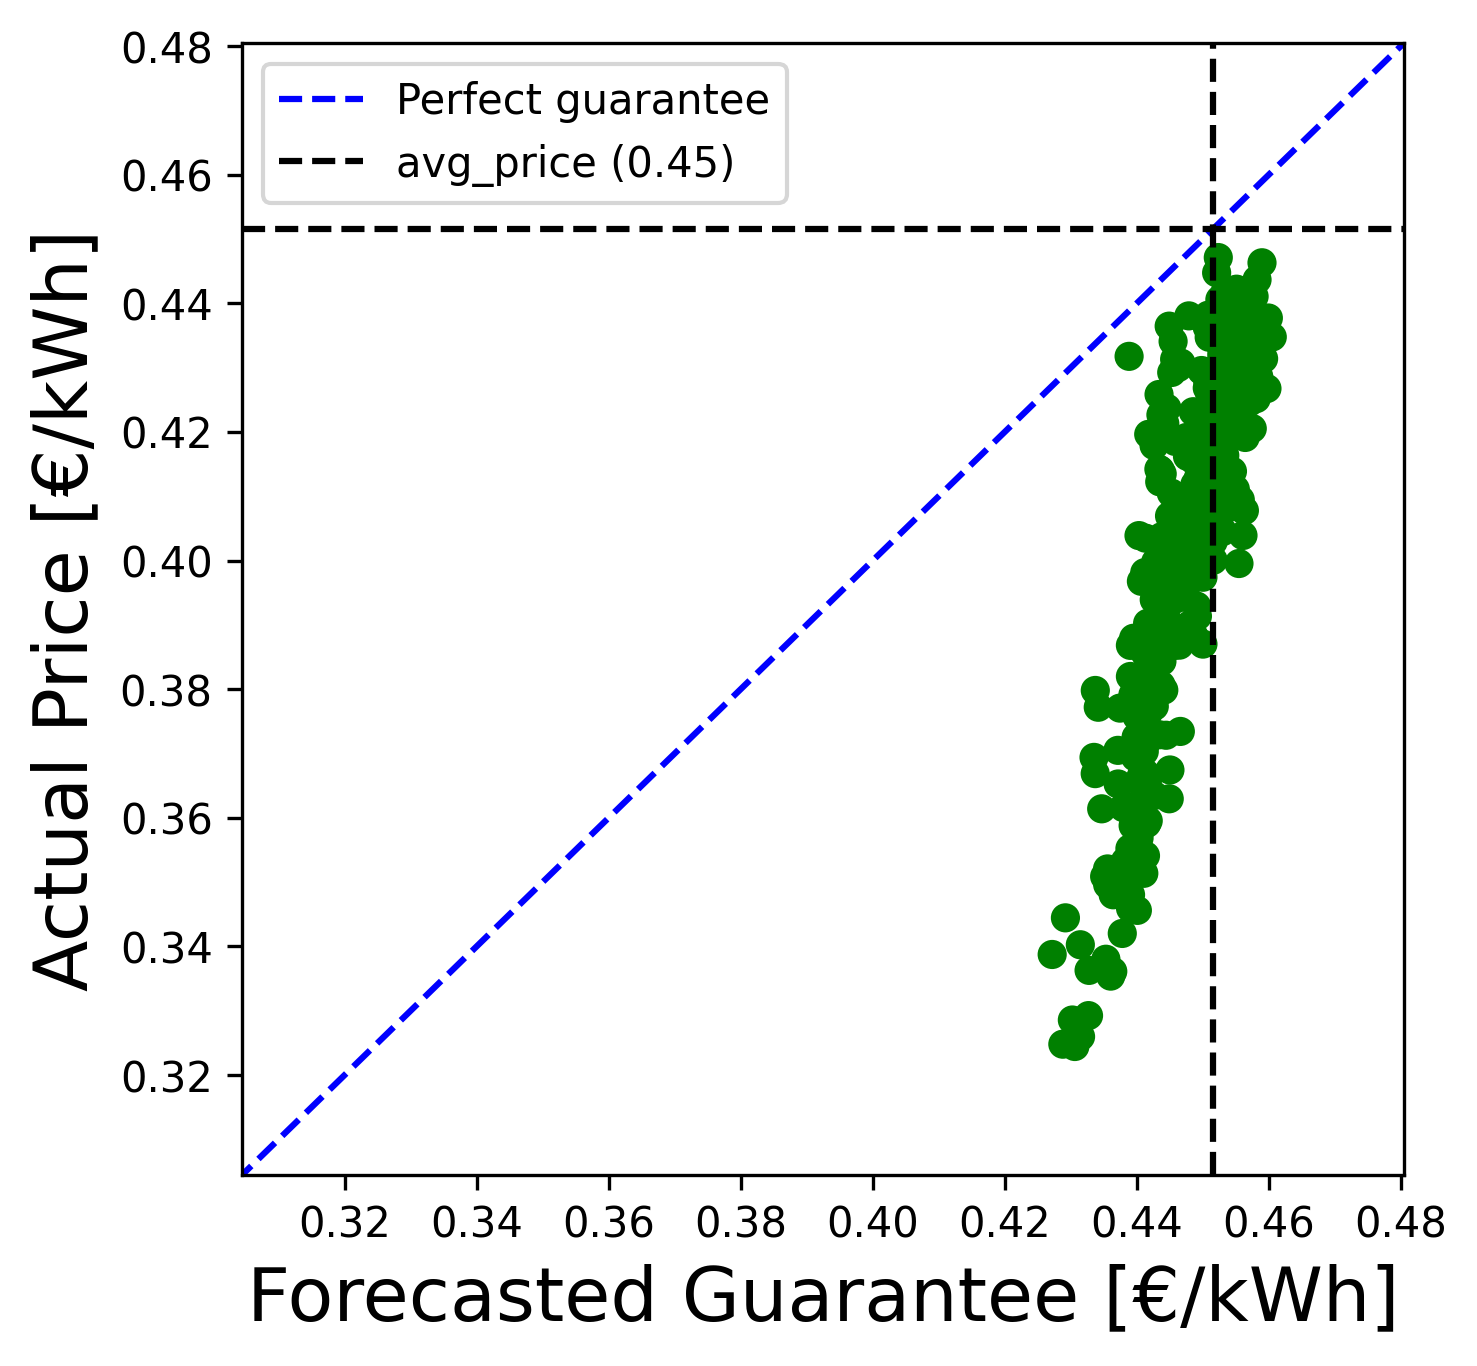

--- data regression ---
7        519.863818
85       709.711350
90       751.882987
103      578.719458
167      467.850069
           ...     
9296     575.197079
9303     615.067539
9331    1096.398985
9383     369.101834
9396     424.229468
Name: Household result [€], Length: 192, dtype: float64


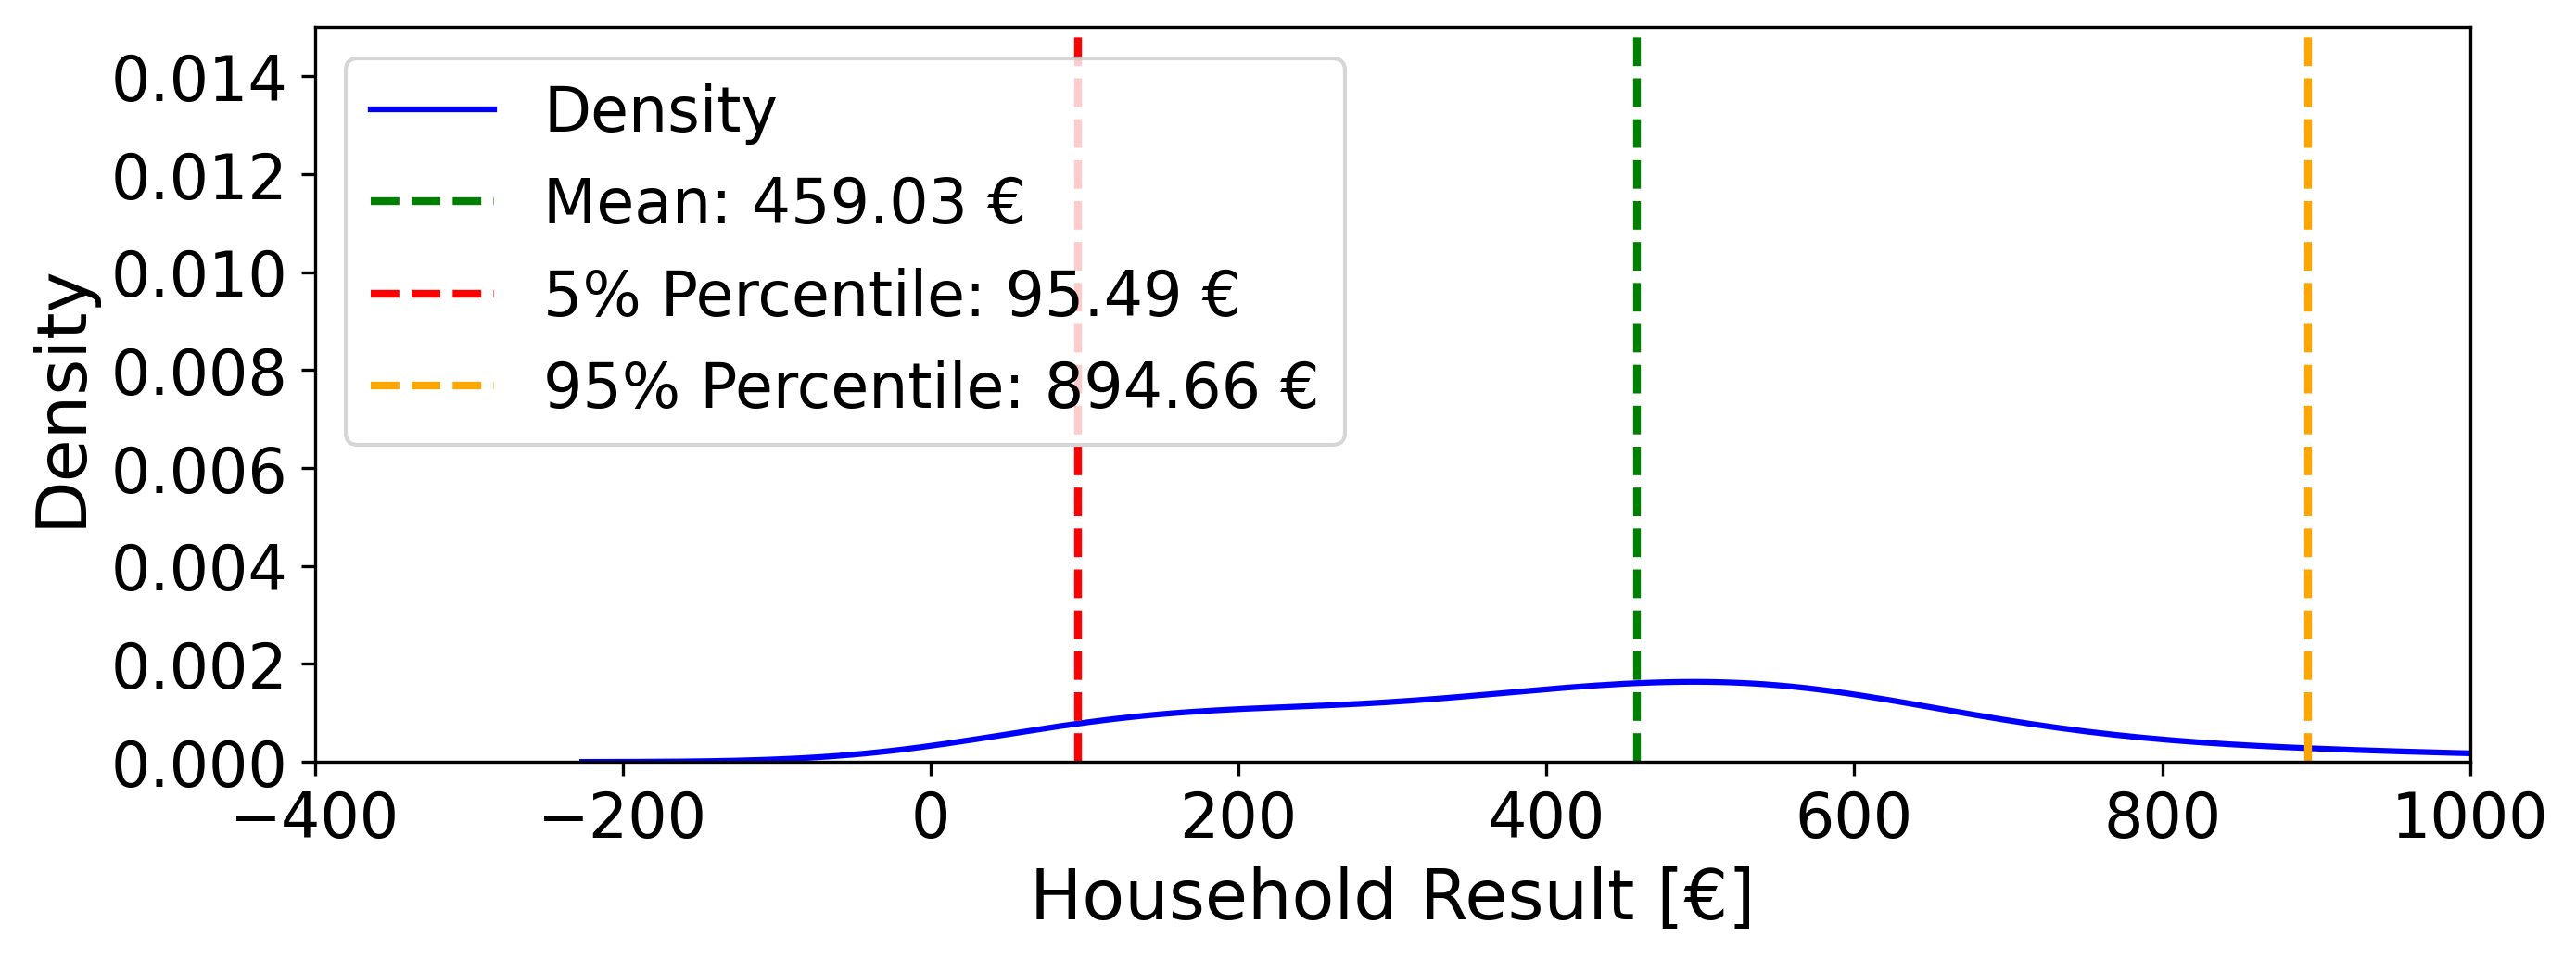

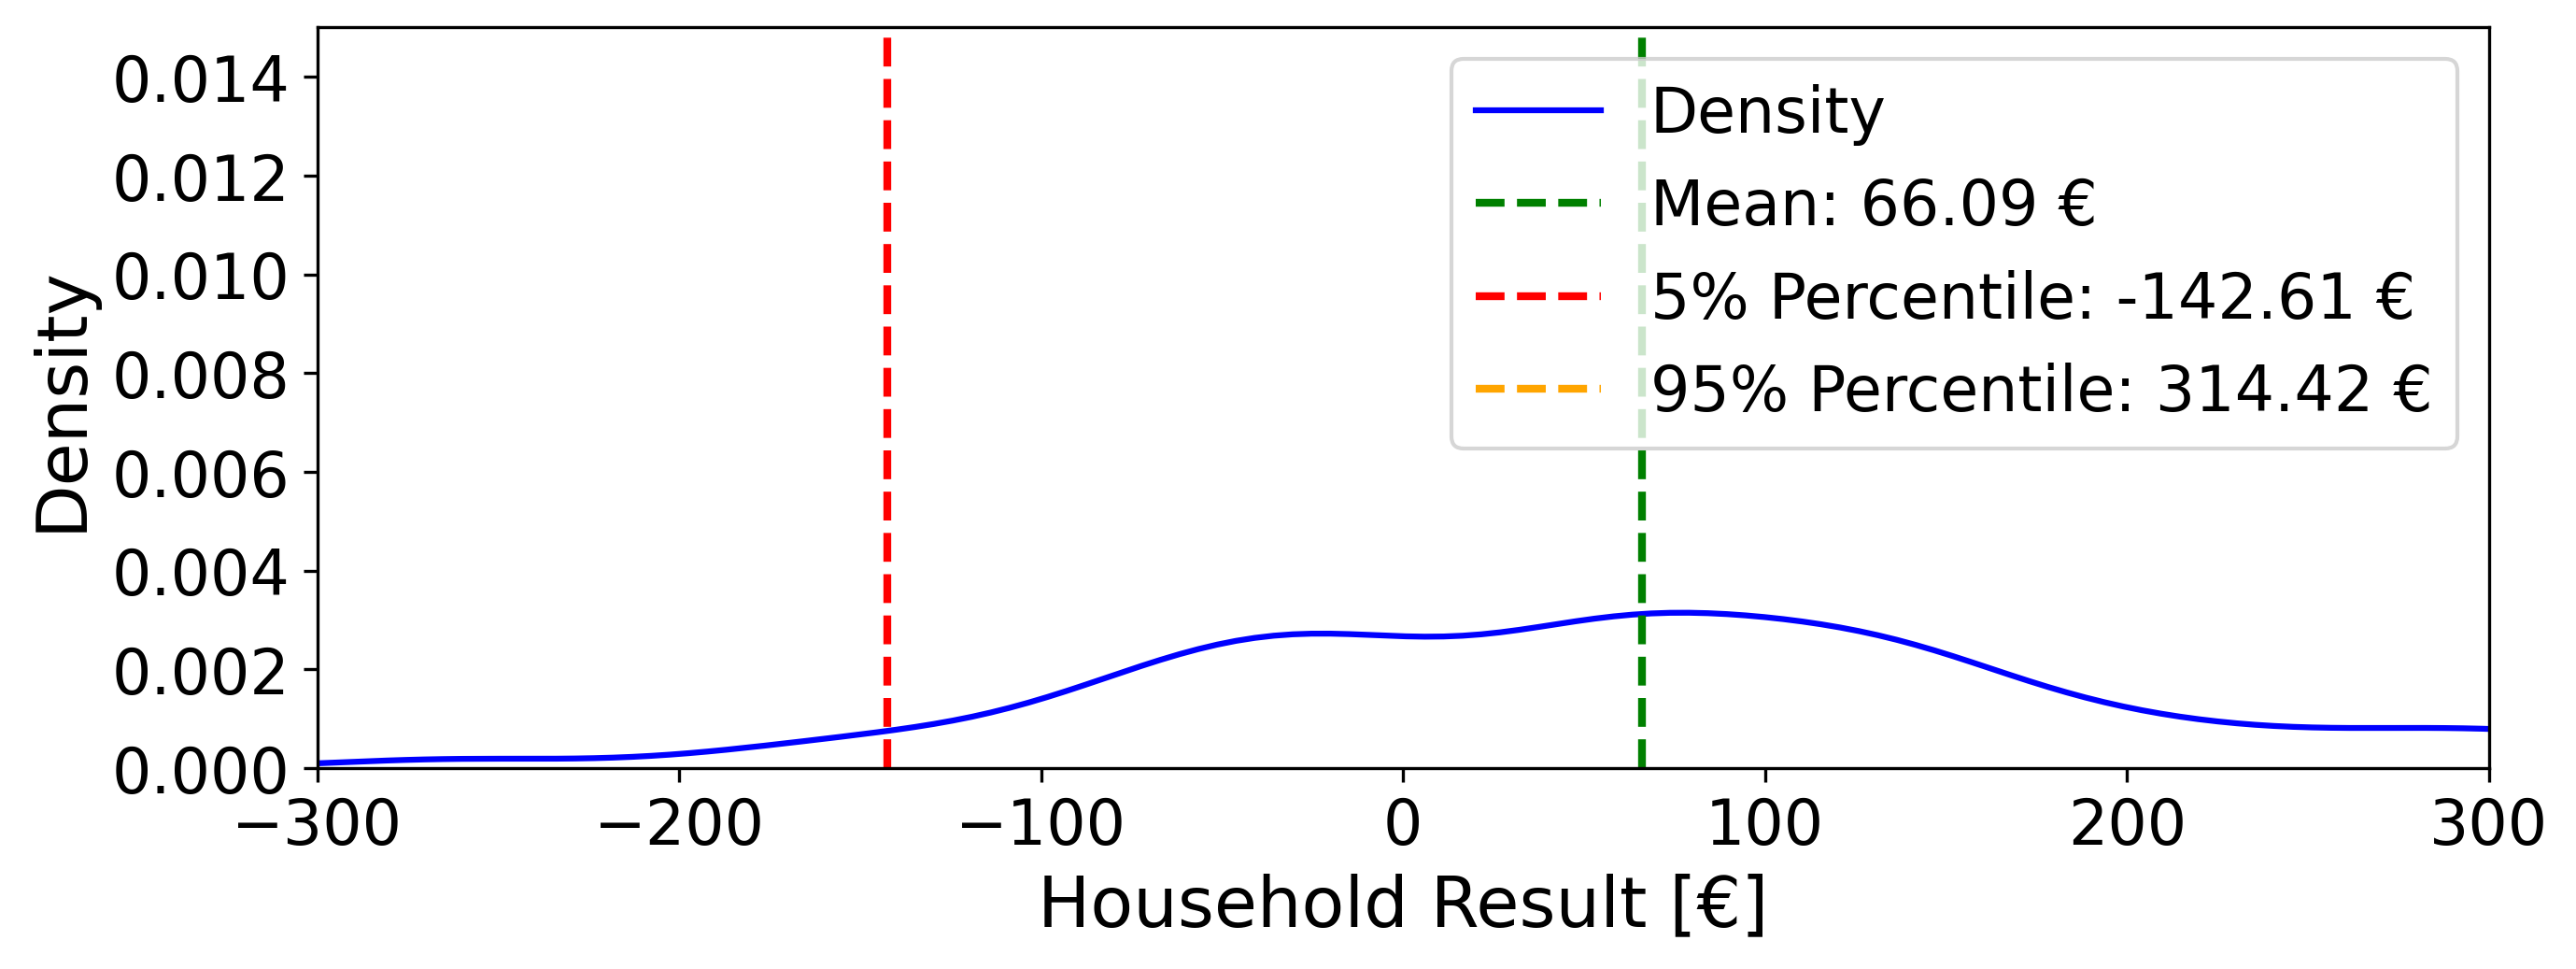

<ipython-input-5-e5eb94aeb962>:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["const"] = 1
<ipython-input-5-e5eb94aeb962>:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["const"] = 1


                                        QuantReg Regression Results                                         
Dep. Variable:     Relative Difference Guaranteed to Avg. Price [%]   Pseudo R-squared:               0.1410
Model:                                                     QuantReg   Bandwidth:                      0.6361
Method:                                               Least Squares   Sparsity:                        5.603
Date:                                              Wed, 21 Jan 2026   No. Observations:                 6257
Time:                                                      18:08:38   Df Residuals:                     6248
                                                                      Df Model:                            8
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
building_type                    

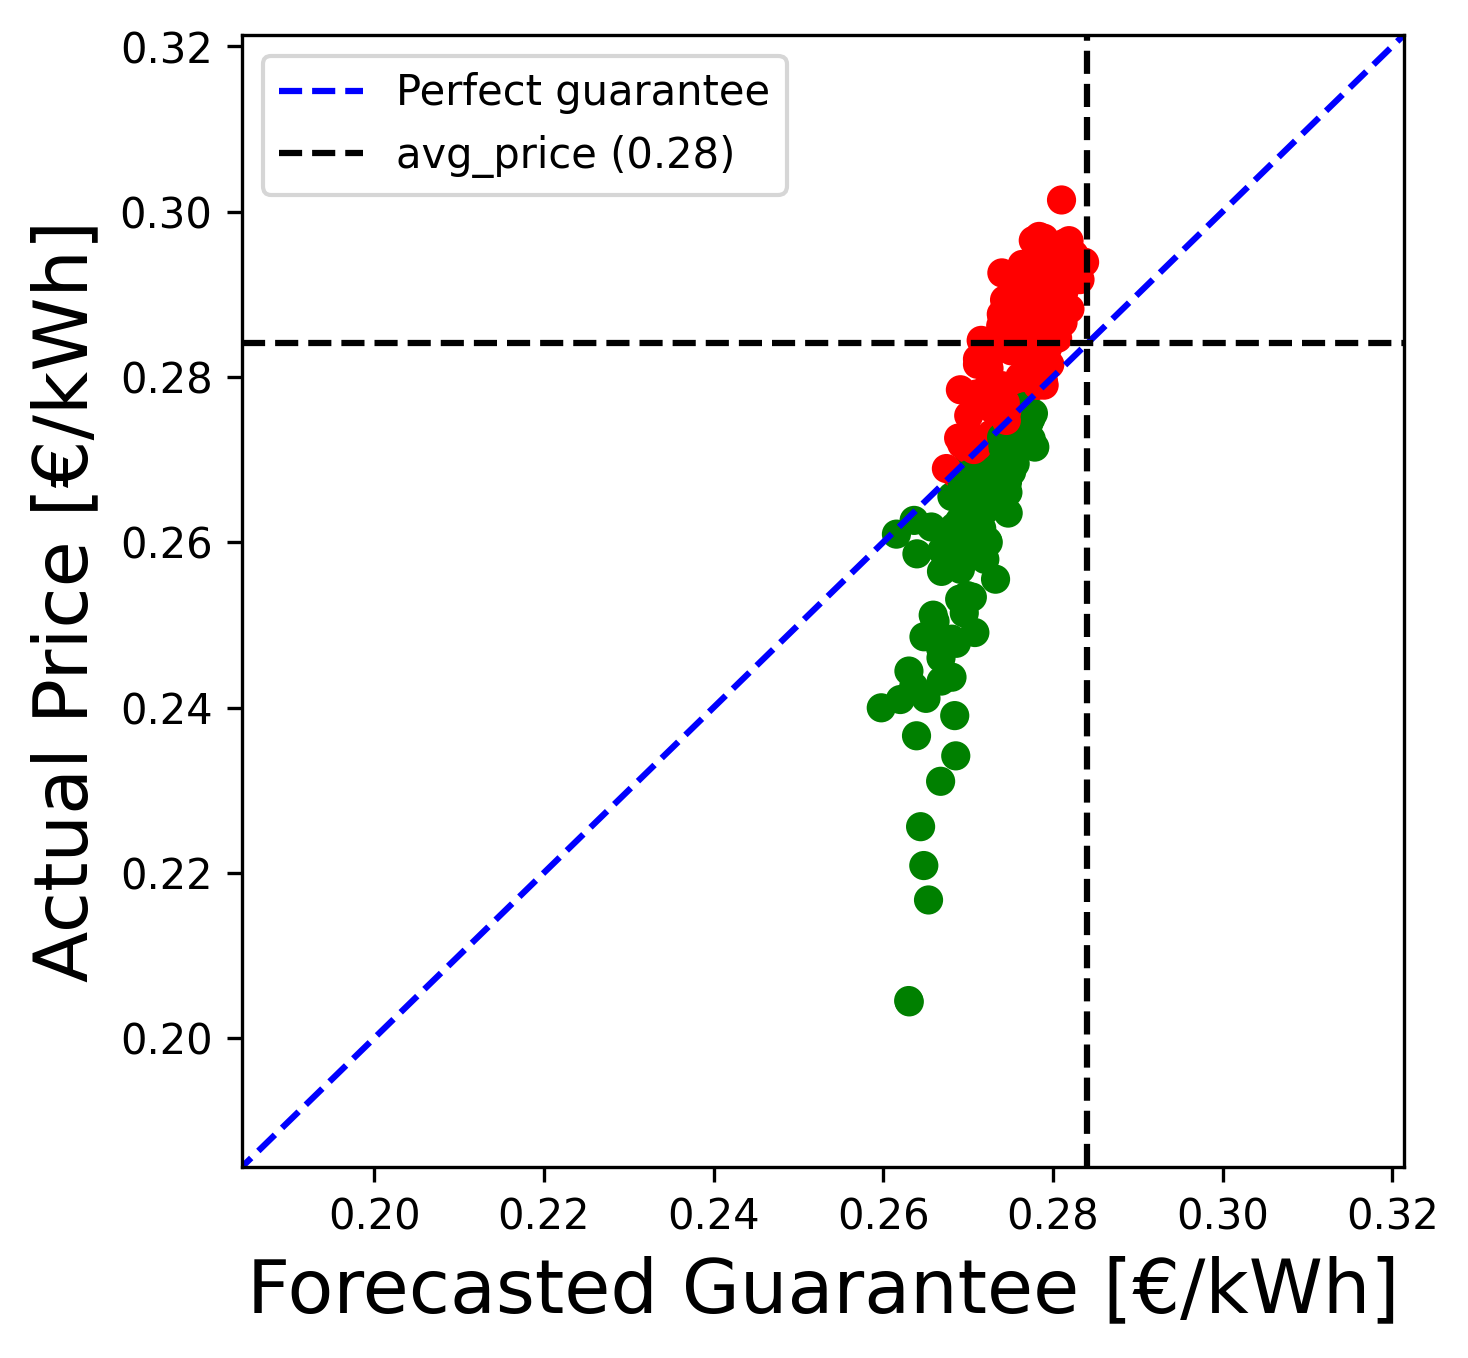

--- data regression ---
17      -62.560203
47       12.336821
86      167.598597
121     -44.394916
170      84.578461
           ...    
9192     -2.113848
9224    -11.448153
9263   -363.825419
9326   -181.180229
9421     22.795057
Name: Household result [€], Length: 225, dtype: float64


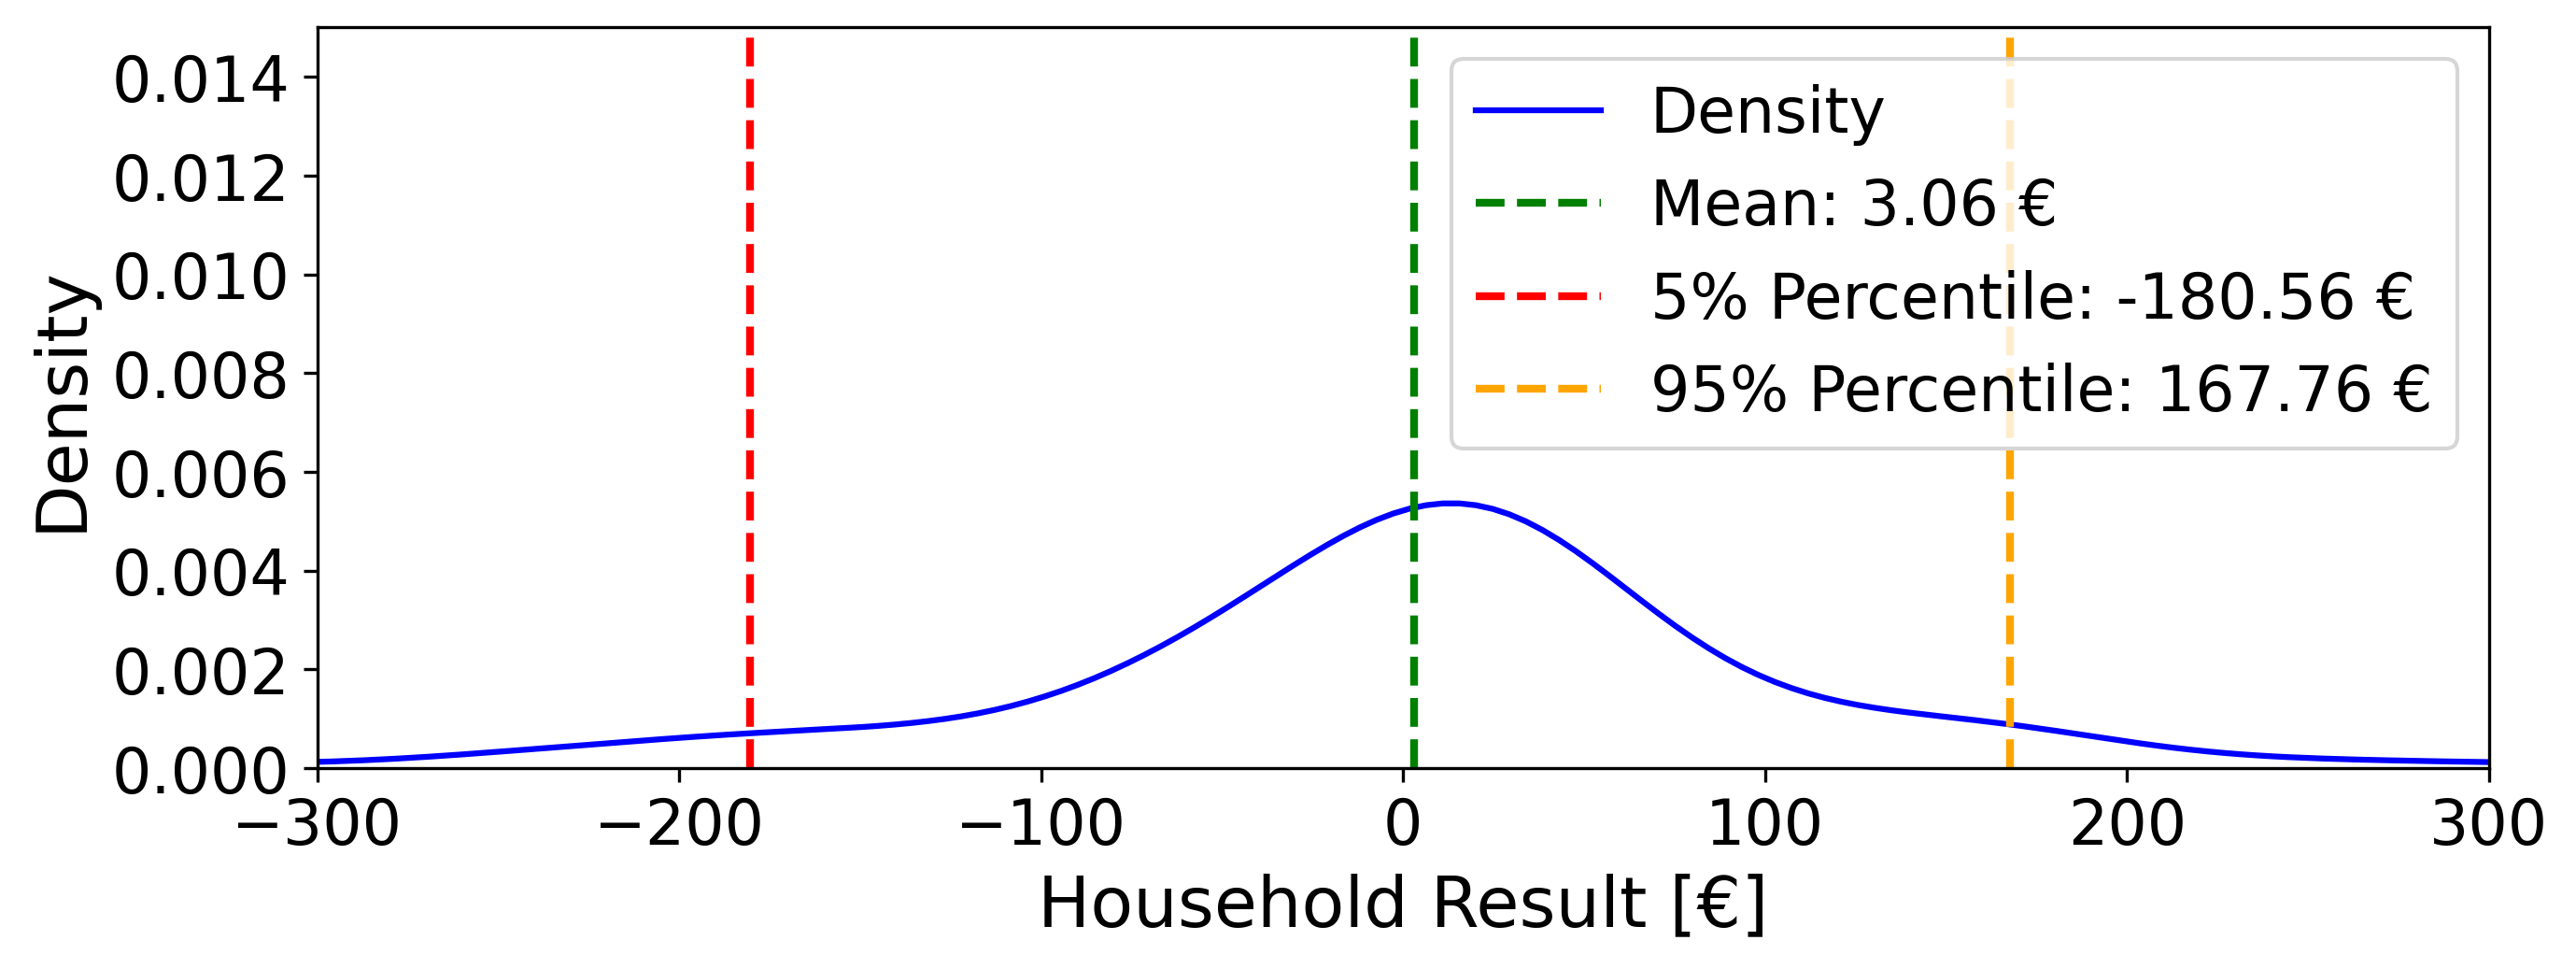

In [5]:
market_stat_cols = []

def load_and_preprocess_data(tariff_option, target_year, only_pv=True, pv_internal_correction=True,
                             merge_with_market_characteristics=False,
                             merge_with_reduced_market_characteristics=True,relative_forecasting=True):
    result_df = pd.read_pickle(f"./results/{tariff_option} 20241218 ResultDB Final.pkl")
    result_df = pd.get_dummies(result_df, columns=['setpoint_option'], drop_first=False)
    result_df = result_df[
        (result_df['setpoint_option_nighttime_setback'] == 1) | 
        (result_df['setpoint_option_unobstructed'] == 1)
    ]

    if only_pv:
        result_df = result_df[result_df["sampled_pv_size"] > 0]

    if pv_internal_correction:
        result_df["sum_p_total"] = result_df["sum_p_total"] + (result_df["sum_P_pv"] - result_df["sum_P_pv_feedin"])
        #result_df["cost_per_kwh"] = result_df["sum_p_total"]/result_df["total_costs"]
        
    # Merging with market characteristics was an earlier iteration, which is not pursued in the final paper
    if merge_with_market_characteristics:
        result_df = result_df.merge(seasonal_results_df, on="year", how="left")

    if merge_with_reduced_market_characteristics:
        market_stat_cols_with_year = market_stat_cols + ["year"]
        seasonal_results_df_reduced = seasonal_results_df[market_stat_cols_with_year]
        result_df = result_df.merge(seasonal_results_df_reduced, on="year", how="left")
        

    result_df["Difference Guaranteed to Avg. Price [€/kWh]"] = result_df["cost_per_kwh"] - result_df["avg_price"]
    if relative_forecasting:
        result_df["Relative Difference Guaranteed to Avg. Price [%]"] = (
            (result_df["cost_per_kwh"] - result_df["avg_price"]) / result_df["avg_price"] * 100
        )
        

    return result_df

def calculate_baseline_metrics(result_df, target_year, replace_with_vwap_prices =True):
    result_df_avg = result_df[result_df["year"] == target_year].copy()
    if replace_with_vwap_prices:
        replacement_dict = {
            "2018": 0.307085*1.19,
            "2019": 0.311892*1.19,
            "2020": 0.305399*1.19,
            "2021": 0.344810,
            "2022": 0.451553, 
            "2023": 0.284052
        }
        result_df_avg["avg_price"] = result_df_avg["year"].astype(str).map(replacement_dict)
    result_df_avg["Forecasted Guarantee [€/kWh]"] = result_df_avg["avg_price"]
    result_df_avg["Energy bill guaranteed [€]"] = result_df_avg["Forecasted Guarantee [€/kWh]"] * result_df_avg["sum_p_total"]
    result_df_avg["Energy bill actual [€]"] = result_df_avg["cost_per_kwh"] * result_df_avg["sum_p_total"]
    result_df_avg["Household result [€]"] = result_df_avg["Energy bill guaranteed [€]"] - result_df_avg["Energy bill actual [€]"]
    return result_df_avg

def plot_distribution(data, title, target_year, output_file):
    data_cleaned = pd.to_numeric(data, errors='coerce').dropna()
    mean_value = data_cleaned.mean()
    var_95 = np.percentile(data_cleaned, 5)
    var_5 = np.percentile(data_cleaned, 95)
    skewness = skew(data_cleaned)
    kurt = kurtosis(data_cleaned, fisher=True)

    plt.figure(figsize=(10, 3.5), dpi=300)
    sns.kdeplot(data_cleaned, color="blue", label="Density")
    plt.axvline(mean_value, color="green", linestyle="--", linewidth=2, label=f"Mean: {mean_value:.2f} €")
    plt.axvline(var_95, color="red", linestyle="--", linewidth=2, label=f"5% Percentile: {var_95:.2f} €")
    plt.axvline(var_5, color="orange", linestyle="--", linewidth=2, label=f"95% Percentile: {var_5:.2f} €")

    if target_year == 2021:
        plt.xlim(-300, 300)
        plt.ylim(0, 0.02)
    elif target_year == 2022:
        plt.xlim(-400, 1000)
        plt.ylim(0, 0.015)
    elif target_year == 2023:
        plt.xlim(-300, 300)
        plt.ylim(0, 0.015)

    
    #plt.title(title, fontsize=18)
    plt.xlabel("Household Result [€]", fontsize=18)
    plt.ylabel("Density", fontsize=18)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.grid(True)
    #plt.savefig(output_file, bbox_inches="tight")
    plt.show()
    plt.close()
    
    
def plot_guarantees(result_df_test):
    
    vwap = {
            "2018": 0.307085*1.19,
            "2019": 0.311892*1.19,
            "2020": 0.305399*1.19,
            "2021": 0.344810,
            "2022": 0.451553, 
            "2023": 0.284052
        }
    avg_price = vwap.get(str(result_df_test["year"].iloc[0]), 0)
    #avg_price = result_df_test["avg_price"].iloc[0]
    print(avg_price)
    
    
    plt.figure(figsize=(5, 5),dpi=300)
    max_value = max(
        result_df_test["cost_per_kwh"].max(), 
        result_df_test["Forecasted Guarantee [€/kWh]"].max(),
        avg_price
    )+0.02
    
    min_value = min(result_df_test["cost_per_kwh"].min(), result_df_test["Forecasted Guarantee [\u20ac/kWh]"].min())-0.02
    # Scatter points with color distinction
    plt.scatter(
        result_df_test["Forecasted Guarantee [\u20ac/kWh]"], 
        result_df_test["cost_per_kwh"], 
        c=(result_df_test["cost_per_kwh"] > result_df_test["Forecasted Guarantee [\u20ac/kWh]"]).map({True: 'red', False: 'green'})
    )
    
    print("--- Variance:")
    # Calculate and print variances
    year = result_df_test["year"].iloc[0]
    forecasted_variance = result_df_test["Forecasted Guarantee [\u20ac/kWh]"].std()
    actual_variance = result_df_test["cost_per_kwh"].std()
    
    print(f"Year: {year}")
    print(f"Forecasted Guarantee standard deviation: {forecasted_variance:.6f}")
    print(f"Actual Price (cost_per_kwh) standard deviation: {actual_variance:.6f}")
    
    # Add the diagonal line where y=x
    plt.plot([0, max_value], [0, max_value], color="blue", linestyle="--", label="Perfect guarantee")
    # Add horizontal and vertical lines for avg_price
    
   
    
   
    
    
    
    plt.axhline(y=avg_price, color="black", linestyle="--", label=f"avg_price ({avg_price:.2f})")
    plt.axvline(x=avg_price, color="black", linestyle="--", )
    # Customize plot
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.xlabel("Forecasted Guarantee [\u20ac/kWh]", fontsize=18)
    plt.ylabel("Actual Price [\u20ac/kWh]", fontsize=18)
    #plt.title("Comparison of Forecasted Guarantee vs. Actual Price")
    plt.legend()
    #plt.grid()
    # Show the plot
    plt.show()

def calculate_regression_metrics(result_df, target_year, merge_with_market_characteristics=False, 
                                  merge_with_reduced_market_characteristics=True, use_quantile_regression=False,relative_forecasting=True):
    # Filter train and test datasets based on setpoint_id
    result_df_train = result_df[(result_df["year"] < target_year) & (result_df["setpoint_id"].astype(int) < 800)]
    result_df_test = result_df[(result_df["year"] == target_year) & (result_df["setpoint_id"].astype(int) >= 800)].copy()

    feature_cols = [
        'building_type', 'Modernization Status', 'E_s_max', 'E_bess_max',
        'sampled_pv_size', 'weather_avg', 'flexibility',
        'setpoint_option_nighttime_setback'
    ]
    if merge_with_market_characteristics or merge_with_reduced_market_characteristics:
        #market_stat_cols = ['Average Daily HighLow Spread (%)', 'Price Change from Last Year (%)']
        feature_cols += market_stat_cols

    X_train = result_df_train[feature_cols]
    if relative_forecasting:
        y_train = result_df_train["Relative Difference Guaranteed to Avg. Price [%]"]
    else:
        y_train = result_df_train["Difference Guaranteed to Avg. Price [€/kWh]"]
    X_test = result_df_test[feature_cols]

    X_train["const"] = 1
    X_test["const"] = 1
    
    

    if use_quantile_regression:
        model = sm.QuantReg(y_train, X_train).fit(q=0.50)
    else:
        model = sm.OLS(y_train, X_train).fit()
        
    print(model.summary())
        
    output_dir = './plots'
    os.makedirs(output_dir, exist_ok=True)

    # Generate the LaTeX representation of the regression summary
    with open(os.path.join(output_dir, 'regression_summary.tex'), 'w') as f:
        f.write(model.summary().as_latex())

    if relative_forecasting:
        result_df_test["Forecasted Relative Difference Guaranteed to Avg. Price [%]"] = model.predict(X_test)
        result_df_test["Forecasted Guarantee [€/kWh]"] = (
            result_df_test["avg_price"] * (1 + result_df_test["Forecasted Relative Difference Guaranteed to Avg. Price [%]"] / 100)
        )
        plot_guarantees(result_df_test)
        #result_df_test["Forecasted Guarantee [€/kWh]"] = result_df_test[["Forecasted Guarantee [€/kWh]", "avg_price"]].min(axis=1)
        result_df_test = result_df_test[result_df_test["Forecasted Guarantee [€/kWh]"] <= result_df_test["avg_price"]]
        
    else:
        result_df_test["Difference Guaranteed to Avg. Price [€/kWh]"] = model.predict(X_test)
        result_df_test["Forecasted Guarantee [€/kWh]"] = result_df_test["avg_price"]-result_df_test["Difference Guaranteed to Avg. Price [€/kWh]"]
        
    

    result_df_test["Energy bill guaranteed [€]"] = result_df_test["Forecasted Guarantee [€/kWh]"] * result_df_test["sum_p_total"]
    result_df_test["Energy bill actual [€]"] = result_df_test["cost_per_kwh"] * result_df_test["sum_p_total"]
    result_df_test["Household result [€]"] = result_df_test["Energy bill guaranteed [€]"] - result_df_test["Energy bill actual [€]"]

    return result_df_test

def run_analysis(merge_with_market_characteristics=False, merge_with_reduced_market_characteristics=False, use_quantile_regression=True):
    results = []
    for tariff_option in ["Constant", "Dynamic"]:
        for target_year in [2021,2022,2023]:
            
            result_df = load_and_preprocess_data(tariff_option, target_year,
                                                 merge_with_market_characteristics=merge_with_market_characteristics,
                                                 merge_with_reduced_market_characteristics=merge_with_reduced_market_characteristics)

            baseline_df = calculate_baseline_metrics(result_df, target_year)
            data_baseline = baseline_df["Household result [€]"]
            plot_distribution(data_baseline, f"Baseline Distribution ({tariff_option}, {target_year})",
                              target_year, f"./plots/{tariff_option}_{target_year}_Baseline.png")

            metrics = {
                "Tariff Option": tariff_option,
                "Target Year": target_year,
                "Method": "Baseline",
                "Mean": data_baseline.mean(),
                "5% VaR": np.percentile(data_baseline, 5),
                "95% VaR": np.percentile(data_baseline, 95),
                "Interval Width": np.percentile(data_baseline, 95) - np.percentile(data_baseline, 5),
            }
            results.append(metrics)

            if tariff_option == "Dynamic":
                regression_df = calculate_regression_metrics(result_df, target_year,
                                                              merge_with_market_characteristics=merge_with_market_characteristics,
                                                              merge_with_reduced_market_characteristics=merge_with_reduced_market_characteristics,
                                                              use_quantile_regression=use_quantile_regression)
                data_regression = regression_df["Household result [€]"]
                print("--- data regression ---")
                print(data_regression)
                plot_distribution(data_regression, f"Regression Distribution ({tariff_option}, {target_year})",
                                  target_year, f"./plots/{tariff_option}_{target_year}_Regression.png")

                metrics = {
                    "Tariff Option": tariff_option,
                    "Target Year": target_year,
                    "Method": "Regression",
                    "Mean": data_regression.mean(),
                    "5% VaR": np.percentile(data_regression, 5),
                    "95% VaR": np.percentile(data_regression, 95),
                    "Interval Width": np.percentile(data_regression, 95) - np.percentile(data_regression, 5),
                }
                results.append(metrics)

    results_df = pd.DataFrame(results)
    return results_df

# Run the analysis and save results
results_df = run_analysis(merge_with_market_characteristics=False, merge_with_reduced_market_characteristics=False, use_quantile_regression=True)



In [12]:
pd.read_pickle("./results/Dynamic 20241218 ResultDB Final.pkl")["mean_setpoint_deviation"].max()

6.815300076981617

In [ ]:
results_df.sort_values("Target Year")

In [ ]:
results_df['Case'] = results_df.apply(
    lambda row: 'Fixed average electricity price, no control' if row['Tariff Option'] == 'Constant' and row['Method'] == 'Baseline'
    else 'Guaranteed average electricity price, with control' if row['Tariff Option'] == 'Dynamic' and row['Method'] == 'Baseline'
    else 'Individual guarantees, with control' if row['Tariff Option'] == 'Dynamic' and row['Method'] == 'Regression'
    else None,
    axis=1
)


# Filter out rows with "Guaranteed average electricity price, with control"
filtered_results = results_df[results_df['Case'] != 'Guaranteed average electricity price, with control']

# Drop the 5% VaR and 95% VaR columns
filtered_results = filtered_results.drop(columns=['5% VaR', '95% VaR',"Method","Tariff Option"])

# Rearrange the columns to place Case as the first column
filtered_results = filtered_results[['Case'] + [col for col in filtered_results.columns if col != 'Case']]

# Sort the DataFrame by Target Year
sorted_results = filtered_results.sort_values("Target Year")

# Create a LaTeX table
latex_table = sorted_results.to_latex(
    "./plots/result_table.tex",
    index=False,
    column_format="l l r r",  # Adjust column alignment as needed
    header=True,
    longtable=False,
    escape=False,
    caption="Results by Case and Year",
    label="tab:results",
    float_format="%.2f"
)

sorted_results


In [ ]:
#sorted_results.to_csv("./results/09_sensitivity.csv")


In [ ]:
results_df['Case'] = results_df.apply(
    lambda row: 'Fixed average electricity price, no control' if row['Tariff Option'] == 'Constant' and row['Method'] == 'Baseline'
    else 'Guaranteed average electricity price, with control' if row['Tariff Option'] == 'Dynamic' and row['Method'] == 'Baseline'
    else 'Individual guarantees, with control' if row['Tariff Option'] == 'Dynamic' and row['Method'] == 'Regression'
    else None,
    axis=1
)

# Drop the Tariff Option and Method columns
results_df = results_df.drop(columns=['Tariff Option', 'Method'])

# Rearrange the columns to place Case as the first column
results_df = results_df[['Case'] + [col for col in results_df.columns if col != 'Case']]

# Sort the DataFrame by Target Year
sorted_results = results_df.sort_values("Target Year")

# Create a LaTeX table
latex_table = sorted_results.to_latex(
    "./plots/result_table.tex",
    index=False,
    column_format="l l r r r r",  # Alignments: l=left, r=right
    header=True,
    longtable=False,
    escape=False,
    caption="Results by Case and Year",
    label="tab:results",
    float_format="%.2f"
)

sorted_results

In [ ]:
sorted_results

In [99]:
sorted_results.to_csv("./plots/sensitivities/05 sortedresults.csv")